In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

import logging
logging.basicConfig(level=logging.INFO)

import clustering
import simbox
import fftutils
import bins

Generate input power spectrum using CLASS (http://class-code.net/)

In [2]:
C = clustering.Clustering(k=np.logspace(-4,2,1000))

INFO:clustering:Computing power spectrum with Class code
INFO:clustering:class sig8: 0.863642
INFO:clustering:renormalized class sig8: 0.800000


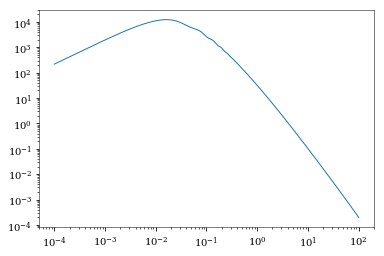

In [3]:
plt.loglog(C.k, C.pk)

Generate fake data

In [4]:
cell_size = 5.
noise_variance = 1.0

shape = (100,100,100)
length = np.array(shape) * cell_size

S = simbox.SimBox(C.k, C.pk, shape, length, lognorm=False, applywindow=False, cachefile=None)

3 [500. 500. 500.] 866.0254037844386
min,max log10(k): 0.012566370614359173 1.0882796185405306 -1.9007901359779038 0.036740495717946214
min,max log10(k): -4.0 2.0


> dreaming of gaussian fields (100, 100, 100)
 % fft time: 0.15160703659057617
> done, seconds: 0.29055213928222656
density field mean: 1.6910917111090385e-18
          variance: 1.2837567671085441


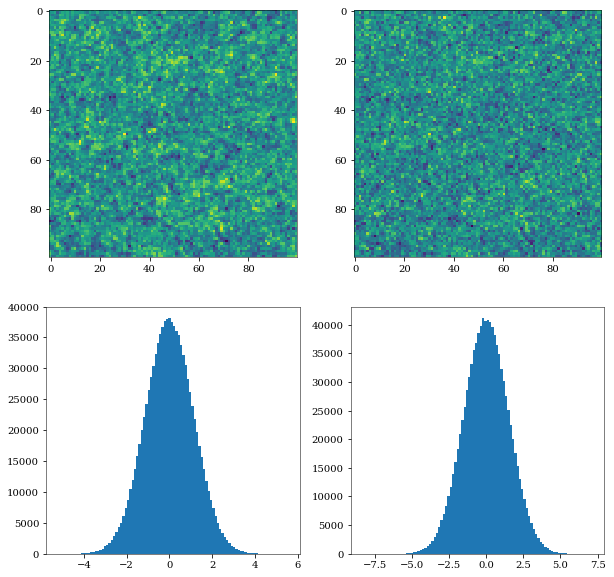

In [5]:
density = S.realize()
print("density field mean:", density.mean())
print("          variance:", density.var())

noise = np.random.normal(0, noise_variance**0.5, density.shape)

density_noisy = density + noise

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(density[0])
plt.subplot(222)
plt.imshow(density_noisy[0])
plt.subplot(223)
plt.hist(density.flat, bins=100)
plt.subplot(224)
_=plt.hist(density_noisy.flat, bins=100)

In [22]:
k, pk_dens = fftutils.powerspectrum(density, length)
k, pk_obs= fftutils.powerspectrum(density_noisy, length)

hitting up kgrid cache
hitting up kgrid cache


In [23]:
kbins = np.logspace(-2,0,50)
kcent = (kbins[1:]+kbins[:-1])/2.
pkb = bins.binit(k, pk_dens, kbins)
pkb_obs = bins.binit(k, pk_obs, kbins)

(10, 50000.0)

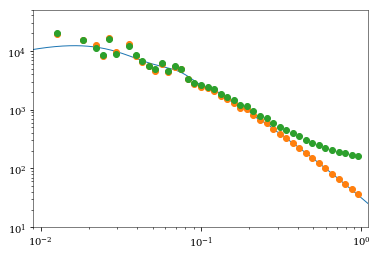

In [24]:
plt.loglog(C.k, C.pk)
plt.loglog(kcent,pkb,"o")
plt.loglog(kcent,pkb_obs,"o")

plt.xlim(kbins.min()*0.9, kbins.max()*1.1)
plt.ylim(10,5e4)